# Hate Speech Detection Data Analysis

## Introduction

In this notebook, we will perform data analysis and exploration on a hate speech detection dataset. The objective is to gain insights into the dataset and prepare it for further processing and modeling.

## Importing Libraries and Loading the Dataset

Let's start by importing the required libraries and loading the hate speech detection dataset.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import seaborn as sns
from scipy.stats import boxcox
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zohra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Zohra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Load the train dataset
train_data = pd.read_csv(r'C:\Development\Github\Zozo\NLP_Hate_Speech\datasets\train_tweets.csv')
# Load the test dataset
test_data = pd.read_csv(r'C:\Development\Github\Zozo\NLP_Hate_Speech\datasets\tests_tweets.csv')

In [30]:
# Display the first few rows of the train dataset
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [31]:
# Display the first few rows of the test dataset
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## Basic Statistics of the Dataset

Next, we will compute some basic statistics of the dataset to gain insights into its distribution and summary statistics.

In [32]:
# Get basic statistics of the train dataset
train_data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


## Class Distribution

It's important to understand the distribution of classes in the dataset, as it will provide an overview of the prevalence of hate speech and non-hate speech tweets.

In [33]:
# Count the number of hate speech and non-hate speech tweets in the train dataset
class_counts = train_data['label'].value_counts()
class_counts

0    29720
1     2242
Name: label, dtype: int64

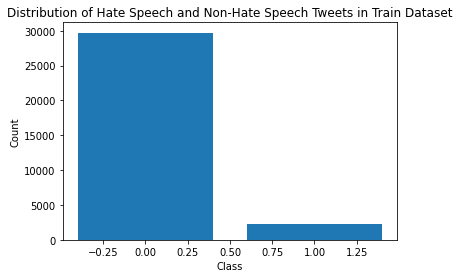

In [34]:
# Visualize the distribution of classes in the train dataset
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech and Non-Hate Speech Tweets in Train Dataset')
plt.show()

## Data Preprocessing

### Text Preprocessing

Text preprocessing is a crucial step in natural language processing tasks. Here, we will perform various preprocessing steps to clean the tweet text and make it suitable for analysis.

In [35]:
# Perform data preprocessing steps
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [36]:
# Apply preprocessing to the train dataset
train_data['clean_text'] = train_data['tweet'].apply(preprocess_text)

In [37]:
# Apply preprocessing to the test dataset
test_data['clean_text'] = test_data['tweet'].apply(preprocess_text)

## Data Analysis and Visualization

### Analyzing the Distribution of Tweet Lengths

Analyzing the distribution of tweet lengths can provide insights into the length patterns in hate speech and non-hate speech tweets.

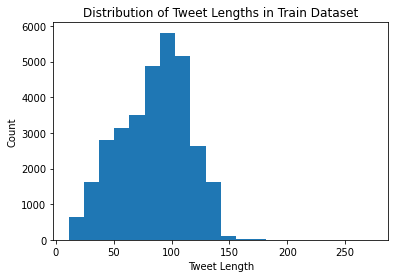

In [38]:
train_data['tweet_length'] = train_data['tweet'].apply(len)

plt.hist(train_data['tweet_length'], bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.title('Distribution of Tweet Lengths in Train Dataset')
plt.show()

### Analysing the Distribution of Word Frequencies

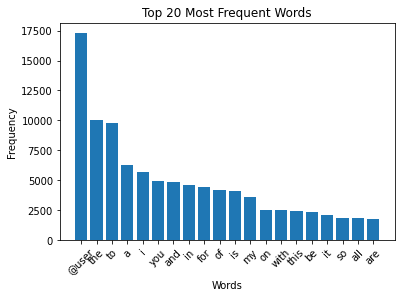

In [44]:
word_freq = train_data['tweet'].str.split(expand=True).stack().value_counts()
top_words = word_freq.head(20)
plt.bar(top_words.index, top_words.values)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()

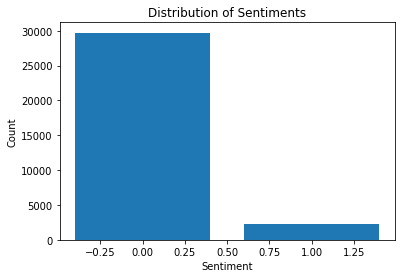

In [52]:
# Sentiment analysis
sentiment_counts = train_data['label'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

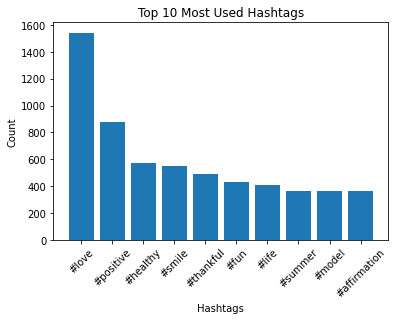

In [53]:
# Hashtag analysis
train_data['hashtags'] = train_data['tweet'].apply(lambda x: re.findall(r'#\w+', x))
hashtags = train_data['hashtags'].explode().value_counts().head(10)
plt.bar(hashtags.index, hashtags.values)
plt.xticks(rotation=45)
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Most Used Hashtags')
plt.show()

## Feature Engineering

### TF-IDF Vectorization

For feature engineering, we will use TF-IDF vectorization to convert the preprocessed text into numerical features.

In [39]:
# Perform feature engineering using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['clean_text'])
X_test = vectorizer.transform(test_data['clean_text'])

In [40]:
# Print the shape of the train and test feature matrices
print("Train Feature Matrix Shape:", X_train.shape)
print("Test Feature Matrix Shape:", X_test.shape)

Train Feature Matrix Shape: (31962, 39616)
Test Feature Matrix Shape: (17197, 39616)


### Handling Missing Values (NA values)

In [42]:
# Check for missing values in the train_data DataFrame
train_data['tweet'].isnull().sum()


0

In [43]:
# Check for missing values in the test_data DataFrame
test_data['tweet'].isnull().sum()

0

In [92]:
from collections import Counter
import matplotlib.pyplot as plt

def word_frequency_analysis(data):
    words = ' '.join(data).split()
    word_frequencies = Counter(words)
    return word_frequencies

# Sentiment Analysis
def sentiment_analysis(data):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = data.apply(lambda x: sid.polarity_scores(x))
    sentiment_scores = pd.DataFrame(list(sentiment_scores))
    sentiment_scores['sentiment_label'] = sentiment_scores['compound'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
    return sentiment_scores

# Topic Modeling
def topic_modeling(data, num_topics=5):
    vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(data)
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(doc_term_matrix)
    return vectorizer.get_feature_names_out(), lda_model

# Hashtag Analysis
def hashtag_analysis(data):
    hashtags = data.str.findall(r'#(\w+)')
    hashtags = [tag for sublist in hashtags for tag in sublist]
    hashtag_counts = pd.Series(hashtags).value_counts().sort_values(ascending=False)
    return hashtag_counts

# Emoji Analysis
def emoji_analysis(data):
    emoji_regex = r'(:[^:\s]*(?:::[^:\s]*)*:)|((?<!\w)\\[a-zA-Z1-9_]+(?!\w))'
    emojis = data.str.findall(emoji_regex)
    emojis = [emoji for sublist in emojis for emoji in sublist]
    emoji_counts = pd.Series(emojis).value_counts().sort_values(ascending=False)
    return emoji_counts

# Named Entity Recognition (NER)
def ner_extraction(data):
    nlp = spacy.load('en_core_web_sm')
    named_entities = []
    for tweet in data:
        doc = nlp(tweet)
        entities = [ent.text for ent in doc.ents]
        named_entities.extend(entities)
    named_entity_counts = pd.Series(named_entities).value_counts().sort_values(ascending=False)
    return named_entity_counts

Top 10 Words by Frequency:
@user: 17291
the: 10065
to: 9768
a: 6261
i: 5655
you: 4949
and: 4831
in: 4570
for: 4435
of: 4152


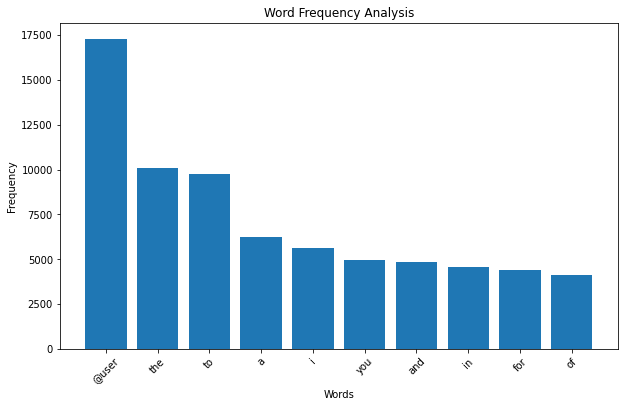

In [83]:
# Word Frequency Analysis
tweet_data = train_data['tweet'].astype(str)
word_frequencies = word_frequency_analysis(tweet_data)
top_words = word_frequencies.most_common(10)
print("Top 10 Words by Frequency:")
for word, frequency in top_words:
    print(f"{word}: {frequency}")

# Visualize word frequencies
plt.figure(figsize=(10, 6))
words = [word for word, _ in top_words]
frequencies = [frequency for _, frequency in top_words]
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Analysis')
plt.xticks(rotation=45)
plt.show()

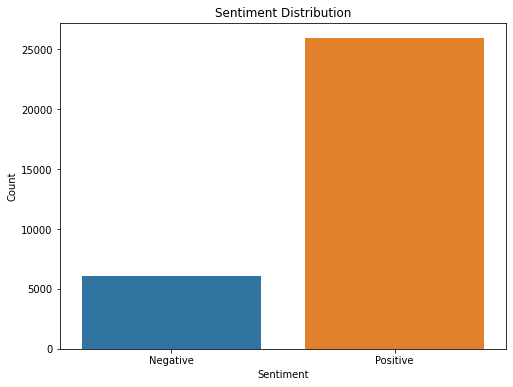

Positive    25917
Negative     6045
Name: sentiment_label, dtype: int64


In [107]:
# Sentiment Analysis
sentiment_scores = sentiment_analysis(tweet_data)
sentiment_distribution = sentiment_scores['sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=sentiment_scores, x='sentiment_label')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

print(sentiment_distribution)

In [93]:
# Topic Modeling
num_topics = 5
feature_names, lda_model = topic_modeling(tweet_data, num_topics)
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}")
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print(", ".join(top_words))

Topic #1
day, happy, new, love, father
Topic #2
love, life, time, bull, smile
Topic #3
like, amp, need, people, don
Topic #4
user, thankful, positive, amp, just
Topic #5
user, good, amp, gt, music


In [94]:
# Hashtag Analysis
hashtag_counts = hashtag_analysis(tweet_data)
print("Top 10 Hashtags:")
print(hashtag_counts.head(10))

Top 10 Hashtags:
love           1542
positive        874
healthy         571
smile           548
thankful        491
fun             434
life            406
summer          367
model           365
affirmation     363
dtype: int64


In [95]:
# Emoji Analysis
emoji_counts = emoji_analysis(tweet_data)
print("Top 10 Emojis:")
print(emoji_counts.head(10))

Top 10 Emojis:
(:):, )       6
(:*:, )       2
(:d:, )       2
(::, )        2
(:30-8:, )    1
(::::::, )    1
(:01:, )      1
(, \o)        1
(, \3)        1
(:42:, )      1
dtype: int64
